In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../mchem_functions')
import PCA_functions as pcf

In [2]:
chosen_PCs = [1,2]
no_of_components = 3

scaling_method = 'SNV'

include_srfa = False
include_molec_tot = False

ms_data_dir = '../../Data/MS_data'
meta_data_csv = 'CSV_files/processed_csv_data_dir/meta_data.csv'

In [3]:
try: os.chdir(ms_data_dir)
except FileNotFoundError: pass

In [4]:
meta_data_df = pd.read_csv(meta_data_csv,index_col=0)
sample_names = list(meta_data_df.index)
variables = list(meta_data_df.columns)

if not include_srfa:
    sample_names = [name for name in sample_names if 'SRFA' not in name.upper()]
    meta_data_df = meta_data_df.loc[sample_names]

if not include_molec_tot:
    variables = [variable for variable in variables if '_tot' not in variable]
    meta_data_df = meta_data_df[variables]

meta_data_arr = meta_data_df.to_numpy()

In [5]:
sample_info = {
    'Site': [],
    'Letter': [],
    'Season': [],
    'Type': [],
}

for name in sample_names:
    if 'SRFA' in name.upper():
        sample_info['Site'].append('NA')
        sample_info['Letter'].append('NA')
        sample_info['Season'].append('NA')
        sample_info['Type'].append('SRFA')

    else:
        name = name.split('-')
        sample_info['Site'].append(name[0])
        sample_info['Letter'].append(name[1])
        sample_info['Season'].append(name[2])
        if 'PL' in name:
            sample_info['Type'].append('PL')
        else:
            sample_info['Type'].append('PW')

for info in sample_info:
    sample_info[info] = np.array(sample_info[info])
# sample_info

In [6]:
scores_values, variance_ratio, PCs, loadings = pcf.get_pca_data(meta_data_arr,no_of_components,scaling_method)

In [7]:
sample_info.keys()

dict_keys(['Site', 'Letter', 'Season', 'Type'])

In [8]:
scores_values

array([[-1.73345385e-01, -5.27239288e-02, -1.79631179e-16],
       [ 1.48706442e-01, -8.41357470e-02, -1.79631179e-16],
       [ 2.46389434e-02,  1.36859676e-01, -1.79631179e-16]])

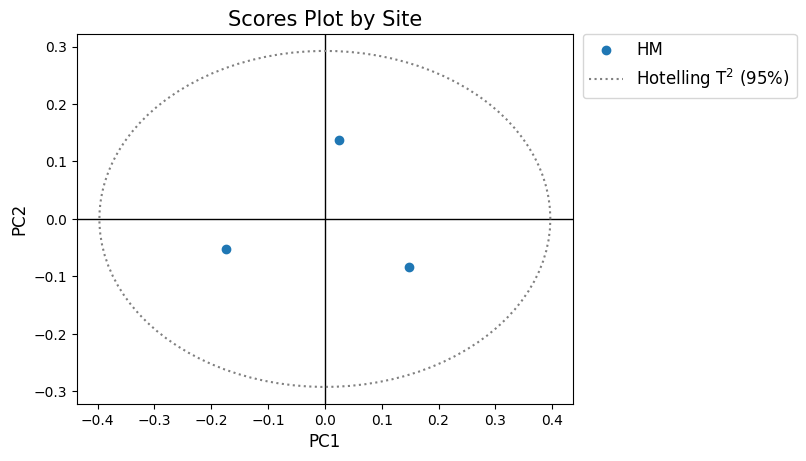

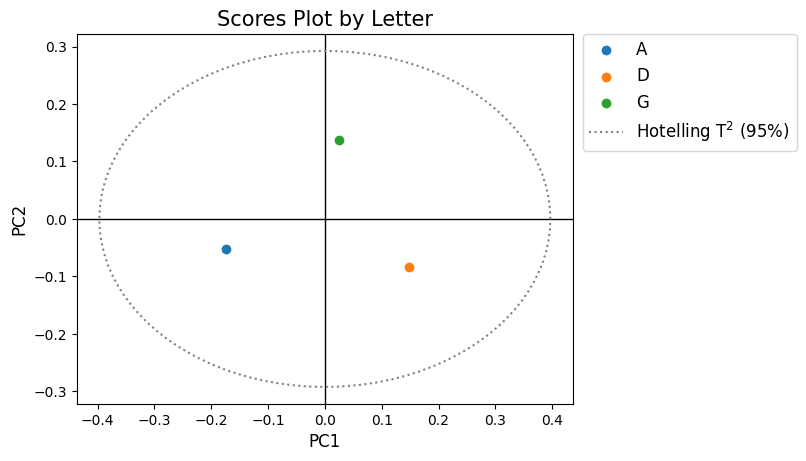

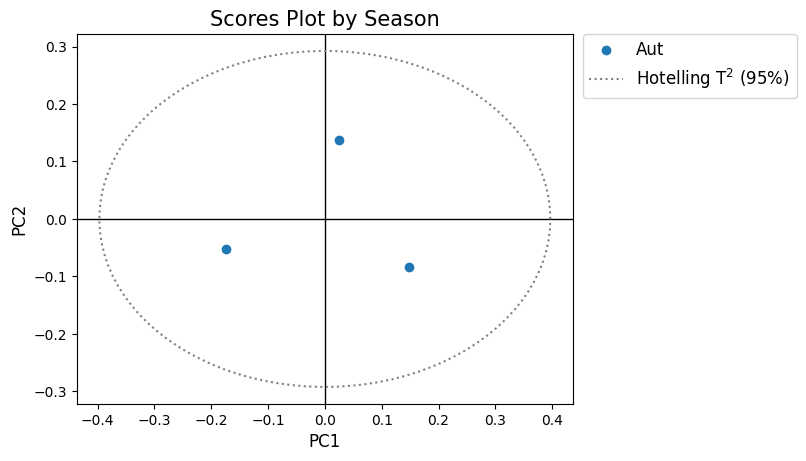

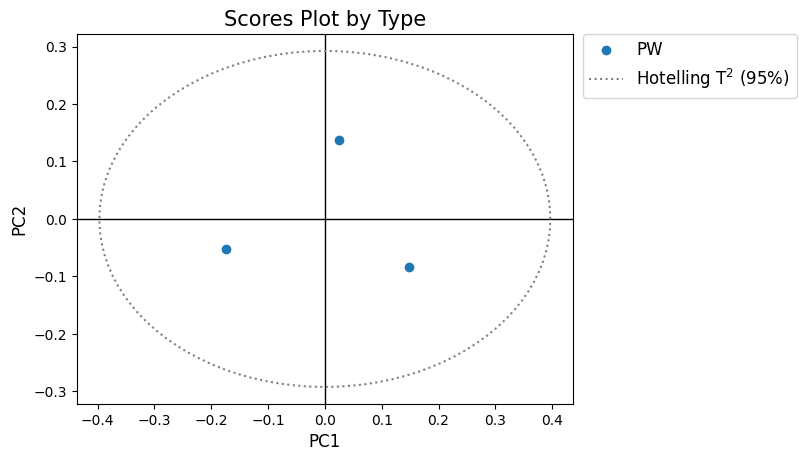

In [9]:
chosen_info = []
if chosen_info in [None,[],[None]]:
    chosen_info = sample_info.keys()

for info in chosen_info:
    unique_info = np.unique(sample_info[info])

    fig_scores, ax_scores = plt.subplots()
    
    for u in unique_info:
        idx = np.where(sample_info[info] == u)
        pcf.scores_plot(scores_values[idx],chosen_PCs,lines=False,fig=fig_scores,ax=ax_scores,label=u)
    
    pcf.Hotelling(scores_values,chosen_PCs,ax_scores)

    ax_scores.set_title(f'Scores Plot by {info}',fontsize=15)
    ax_scores.axhline(y=0, color = '#000', linewidth = 1, zorder=-1)
    ax_scores.axvline(x=0, color = '#000', linewidth = 1, zorder=-1)

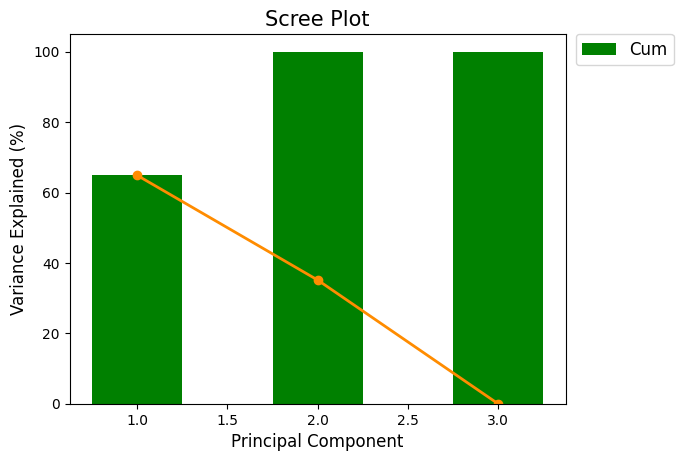

In [10]:
pcf.scree_plot(PCs,variance_ratio)

{'linestyle': '', 'marker': 'o'}

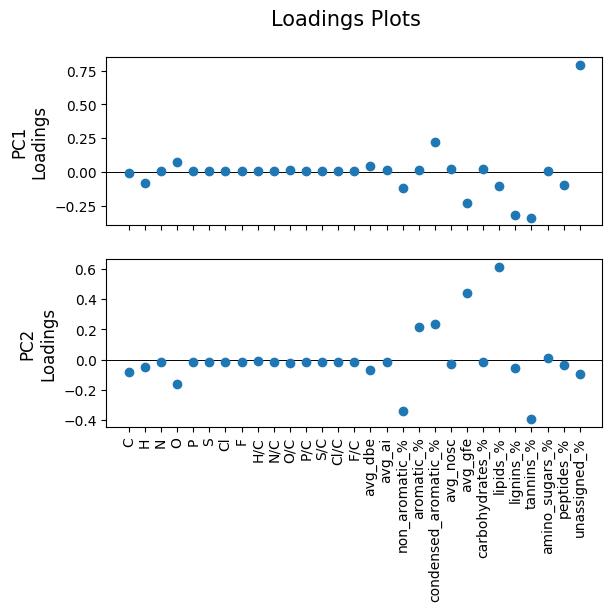

In [11]:
pcf.loadings_plot(variables,loadings,chosen_PCs,text_rotation=90,linestyle='',marker='o')